In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# The rest of your code...

# Load the dataset
file_path = '/content/drive/MyDrive/OurDataset_train.csv'
df = pd.read_csv(file_path)

# Download 1200 different news (200 from each category)
# Assuming the categories are labeled as integers (0 to 5)
news_per_category = 200
selected_data = pd.DataFrame()
for category in range(6):
    category_data = df[df['label'] == category].head(news_per_category)
    selected_data = pd.concat([selected_data, category_data], ignore_index=True)

if df.empty:
  print("The DataFrame is empty")
else:
  print("The DataFrame is not empty")



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The DataFrame is not empty


In [ ]:
import json
import requests
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Download Bengali stopwords JSON file from the repository
url = 'https://raw.githubusercontent.com/stopwords-iso/stopwords-bn/master/stopwords-bn.json'
response = requests.get(url)
bengali_stopwords = response.json()

# Add your additional stopwords to the set if needed
#additional_stopwords = set(["এবং", "অথবা", "এই", ...])

# Combine stopwords from both sources
stop_words = set(bengali_stopwords)
#| additional_stopwords

# Rest of your code...



In [ ]:
!pip install bangla-stemmer

In [ ]:
!pip install bnlp_toolkit



In [ ]:
from bangla_stemmer.stemmer import stemmer



In [ ]:
# Function to preprocess text
# Initialize Porter Stemmer
stemmer = stemmer.BanglaStemmer()
# Punctuation to remove from the Bengali text
punctuations = ['.', '?', ',', '!', ':', ';', '(', ')', '‘','”','।','[', ']']
def preprocess_text(text):
    # Remove punctuations
    for punctuation in punctuations:
        text = text.replace(punctuation, ' ')

    # Tokenize the text
    tokens = word_tokenize(text)



    # Stemming
    stemmed_tokens = [stemmer.stem(word) for word in tokens]

    # Remove stop words
    tokens_without_stopwords = [word for word in stemmed_tokens if word.lower() not in stop_words]

    return tokens_without_stopwords

# Apply preprocessing to all sentences in the DataFrame
df['tokenized_text'] = df['text'].apply(preprocess_text)

# Zipf's law to discard most and least frequent words
word_counts = {}
for tokens in df['tokenized_text']:
    for token in tokens:
        if token in word_counts:
            word_counts[token] += 1
        else:
            word_counts[token] = 1

total_words = sum(word_counts.values())
word_frequencies = {word: count / total_words for word, count in word_counts.items()}

# Sort words by frequency
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Set a threshold for discarding words based on frequency
threshold_low = 0.001  # Discard words with frequency less than or equal to 1%
threshold_high = 0.995  # Discard words with frequency greater than or equal to 99%

# Identify words to be discarded
discarded_words = set()
for word, freq in sorted_word_frequencies:
    if freq <= threshold_low or freq >= threshold_high:
        discarded_words.add(word)

# Apply filtering
filtered_tokens = []
for tokens in df['tokenized_text']:
    filtered_tokens.append([token for token in tokens if token not in discarded_words])

df['filtered_text'] = filtered_tokens

# Build the vocabulary/term list
vocabulary = set()
for tokens in df['filtered_text']:
    for token in tokens:
        vocabulary.add(token)

# Display the results
print("Tokenized Text:")
print(df['tokenized_text'])
print("Filtered Text:")
print(df['filtered_text'])
print("\nVocabulary/Term List:")
print(vocabulary)


Streaming output truncated to the last 5000 lines.
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth 

In [ ]:
from sklearn import datasets
from sklearn.decomposition import PCA
from keras.datasets import mnist
import numpy as np

In [ ]:
def clustering_objective(data, centroids):
    total_sum = float(0)

    for point in data:
        total_sum += min([np.dot(point - centroid, point - centroid) for centroid in centroids])

    return total_sum / float(len(data))

In [ ]:
def get_euclidean_distance(p1, p2):
    difference = p1 - p2
    sum_of_squared_diff = np.dot(difference, difference)
    distance = np.sqrt(sum_of_squared_diff)
    return distance

In [ ]:
def davies_bouldin_index(data, cluster_affiliation, centroids):
    k = len(np.unique(cluster_affiliation))
    max_radius = np.zeros(k)
    for i in range(k):
        cluster_points = data[cluster_affiliation == i]
        centroid = centroids[i]
        distances = np.array([get_euclidean_distance(point, centroid) for point in cluster_points])
        max_radius[i] = np.max(distances)

    db_index = 0.0
    for i in range(k):
        max_val = float('-inf')
        for j in range(k):
            if i != j:
                val = (max_radius[i] + max_radius[j]) / get_euclidean_distance(centroids[i], centroids[j])
                if val > max_val:
                    max_val = val
        db_index += max_val

    return db_index / k

In [ ]:
def dunn_index(data, cluster_affiliation, centroids):
    k = len(np.unique(cluster_affiliation))
    min_inter_cluster_distance = float('inf')
    max_intra_cluster_diameter = float('-inf')

    for i in range(k):
        cluster_points = data[cluster_affiliation == i]
        centroid = centroids[i]
        intra_cluster_distances = np.array([get_euclidean_distance(point, centroid) for point in cluster_points])
        max_intra_cluster_diameter = max(max_intra_cluster_diameter, np.max(intra_cluster_distances))

        for j in range(k):
            if i != j:
                inter_cluster_distance = get_euclidean_distance(centroids[i], centroids[j])
                min_inter_cluster_distance = min(min_inter_cluster_distance, inter_cluster_distance)

    return min_inter_cluster_distance / max_intra_cluster_diameter


In [ ]:
def purity_score(true_labels, cluster_affiliation):
    contingency_matrix = np.zeros((len(np.unique(true_labels)), len(np.unique(cluster_affiliation))))
    for i, true_label in enumerate(np.unique(true_labels)):
        true_mask = (true_labels == true_label)
        for j, cluster_label in enumerate(np.unique(cluster_affiliation)):
            cluster_mask = (cluster_affiliation == cluster_label)
            contingency_matrix[i, j] = np.sum(true_mask & cluster_mask)

    purity = np.sum(np.max(contingency_matrix, axis=0)) / len(true_labels)
    return purity

In [ ]:
def rand_index(true_labels, cluster_affiliation):
    a = 0
    b = 0
    n = min(len(true_labels), len(cluster_affiliation))

    for i in range(n):
        for j in range(i + 1, n):
            same_true_cluster = (true_labels[i] == true_labels[j])
            same_pred_cluster = (cluster_affiliation[i] == cluster_affiliation[j])

            if same_true_cluster and same_pred_cluster:
                a += 1
            elif not same_true_cluster and not same_pred_cluster:
                b += 1

    rand_idx = (a + b) / (n * (n - 1) / 2)
    return rand_idx


In [ ]:
from sklearn import datasets
from sklearn.decomposition import PCA
from keras.datasets import mnist
import numpy as np

def initialize_centroids(data, k):
    centroids_indices = np.random.choice(data.shape[0], size=k, replace=False)
    centroids = data[centroids_indices, :]
    return centroids



def kmeans(data, k):
    N = np.size(data, 0)

    # Centroids initialization
    centroids = initialize_centroids(data, k)

    # Cluster affiliation: [cluster_number, cluster_number, ..., ..., ..., ...]
    cluster_affiliation = np.array([-1 for _ in range(0, N)])

    flag = 1  # Initialize flag
    j_prev = float('inf')

    while flag:
        # Assign each data point to the closest centroid
        for i, point in enumerate(data):
            min_distance = float('inf')
            min_distance_index = None

            # Find the closest centroid for each data point
            for cluster_index, centroid in enumerate(centroids):
                distance = get_euclidean_distance(centroid, point)
                if distance < min_distance:
                    min_distance = distance
                    min_distance_index = cluster_index

            # Record or update cluster for each data point
            if cluster_affiliation[i] != min_distance_index:
                cluster_affiliation[i] = min_distance_index

        # Recompute centroids
        for cluster_index in range(k):
            # Extract data points belonging to the current cluster
            grouped_points = data[cluster_affiliation == cluster_index]

            # Check if there are data points in the cluster
            if len(grouped_points) > 0:
                # Calculate the sum using dot product along axis 0
                sum_grouped_points = np.sum(grouped_points, axis=0)

                # Calculate the mean and update the centroid
                centroids[cluster_index] = sum_grouped_points / len(grouped_points)

        # Calculate the clustering objective
        j = clustering_objective(data, centroids)

        # Terminate the loop based on the termination criteria
        if abs(j - j_prev) <= 1e-5 * j:
            flag = False
        j_prev = j

    return centroids, cluster_affiliation


In [ ]:
# Function to calculate Term Frequency (TF) matrix
def calculate_tf_matrix(documents):
    tf_matrix = np.zeros((len(documents), len(vocabulary)))

    for i, tokens in enumerate(documents):
        term_frequency = {term: tokens.count(term) for term in set(tokens)}
        for j, term in enumerate(vocabulary):
            tf_matrix[i, j] = term_frequency.get(term, 0)

    return tf_matrix

# Calculate TF matrix for all comments/documents
tf_matrix = calculate_tf_matrix(df['filtered_text'])


In [ ]:
# Print only the first 5 rows and 10 columns
print("Subset of TF Matrix:")
print(tf_matrix[:5, :10])


In [ ]:
# Function to calculate Normalized TF matrix
def calculate_normalized_tf_matrix(tf_matrix):
    normalized_tf_matrix = tf_matrix / np.sum(tf_matrix, axis=1, keepdims=True)
    return normalized_tf_matrix

# Calculate normalized TF matrix
normalized_tf_matrix = calculate_normalized_tf_matrix(tf_matrix)


In [ ]:
# Function to calculate Inverse Document Frequency (IDF)
def calculate_idf(tf_matrix):
    document_frequency = np.sum(tf_matrix > 0, axis=0)
    idf = np.log(len(tf_matrix) / (1 + document_frequency))
    return idf

# Calculate IDF for all terms
idf = calculate_idf(tf_matrix)


In [ ]:
# Print only the first 5 rows and 10 columns
print("Subset of Normalized TF Matrix:")
print(normalized_tf_matrix[:5, :10])


Subset of Normalized TF Matrix:
[[0.         0.         0.         0.         0.00847458 0.
  0.00847458 0.         0.         0.00847458]
 [0.02202643 0.01321586 0.00881057 0.         0.00881057 0.
  0.         0.         0.00881057 0.01762115]
 [0.         0.         0.01481481 0.         0.         0.01481481
  0.         0.         0.03703704 0.        ]
 [0.         0.00531915 0.00531915 0.         0.0106383  0.0106383
  0.         0.00531915 0.01595745 0.        ]
 [0.02614379 0.         0.         0.         0.00653595 0.0130719
  0.         0.         0.         0.        ]]


In [ ]:
def calculate_weighted_matrix(tf_matrix, idf):
    weighted_matrix = tf_matrix * idf
    return weighted_matrix

# Calculate final weighted matrix for all documents
weighted_matrix = calculate_weighted_matrix(tf_matrix, idf)

In [ ]:
# Print only the first 5 rows and 10 columns
print("Subset of Weighted Matrix:")
print(weighted_matrix[:5, :10])


Subset of Weighted Matrix:
[[0.         0.         0.         0.         0.40678781 0.
  1.35898188 0.         0.         0.5067063 ]
 [5.42500028 2.02853324 1.62262585 0.         0.81357563 0.
  0.         0.         2.05673588 2.02682519]
 [0.         0.         1.62262585 0.         0.         2.26875435
  0.         0.         5.1418397  0.        ]
 [0.         0.67617775 0.81131292 0.         0.81357563 2.26875435
  0.         1.06019195 3.08510382 0.        ]
 [4.34000022 0.         0.         0.         0.40678781 2.26875435
  0.         0.         0.         0.        ]]


In [ ]:
# Assuming you have calculated the weighted_matrix as mentioned before

# Number of clusters (categories)
num_clusters = 6

# Perform K-means clustering using your custom kmeans function
centroids, cluster_labels = kmeans(weighted_matrix, num_clusters)

# Assign the cluster labels to the DataFrame
df['cluster_label'] = cluster_labels

# Display the cluster labels
print("Cluster Labels:")
print(df['cluster_label'])

# You can also inspect the centroids of the clusters
print("Cluster Centroids:")
print(centroids)



Cluster Labels:
0        3
1        0
2        3
3        3
4        3
        ..
14369    1
14370    3
14371    3
14372    3
14373    2
Name: cluster_label, Length: 14374, dtype: int64
Cluster Centroids:
[[6.34119730e-01 6.82364045e-01 4.97305523e-01 9.24705304e-01
  7.79842614e-01 6.97922526e-01 6.48381371e-01 8.72354251e-01
  5.25459551e-01 7.03006637e-01 5.55003191e-01 6.16546662e-01
  1.05459307e-02 5.55032377e-01 6.20871150e-01 7.01486394e-01
  6.50983808e-01 6.45775742e-01 3.59050095e-01 5.45038649e-01
  3.84639286e-01 7.98248930e-01 5.02127903e-01 7.65403026e-01
  5.47944049e-01 2.68412042e+00 6.88598556e-01 6.11481401e-01
  5.63721790e-01 4.84194864e-01 6.82716078e-01 1.15572296e+00
  6.45685339e-01 5.69134928e-01 3.42934407e-01 5.30578760e-01
  5.37894482e-01 2.04132915e+00 7.09604200e-01 5.10737127e-01
  5.52809327e-01 1.42804619e+00 4.23192991e-01 6.41390274e-01
  1.16502985e+00 1.14766804e+00 5.52088959e-01 3.33955412e-01
  8.82144448e-01 5.10704122e-01 6.09800038e-01 7.62

In [ ]:
print(len(centroids))

6


In [ ]:
# Assuming you have the true labels for each document
true_labels = df['label']  # Replace 'true_labels' with the actual column name

# Assuming you have already performed k-means clustering and obtained cluster_affiliation and centroids
# cluster_affiliation = ...  # Your cluster labels
# centroids = ...  # Your cluster centroids

# Internal Validation
internal_clustering_objective = clustering_objective(weighted_matrix, centroids)
internal_dunn_index = dunn_index(weighted_matrix, cluster_labels, centroids)
internal_davies_bouldin_index = davies_bouldin_index(weighted_matrix, cluster_labels, centroids)

print("Internal Validation:")
print("Clustering Objective:", internal_clustering_objective)
print("Dunn Index:", internal_dunn_index)
print("Davies-Bouldin Index:", internal_davies_bouldin_index)

# External Validation
external_purity_score = purity_score(true_labels, cluster_labels)
external_rand_index = rand_index(true_labels, cluster_labels)

print("\nExternal Validation:")
print("Purity Score:", external_purity_score)
print("Rand Index:", external_rand_index)


Internal Validation:
Clustering Objective: 237.90418072041325
Dunn Index: 0.09088315692102891
Davies-Bouldin Index: 5.564688917047445

External Validation:
Purity Score: 0.4167246417142062
Rand Index: 0.6383093538081598


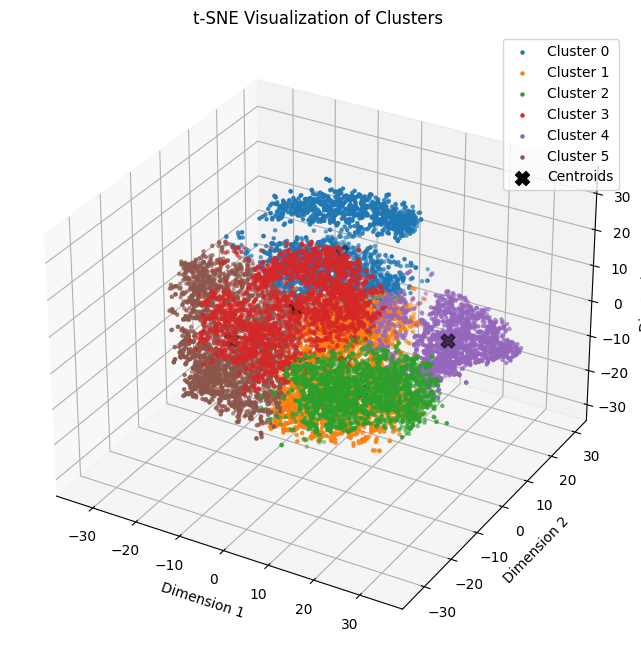

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming you have the necessary data (weighted_matrix)
# weighted_matrix = ...  # Your feature vectors

# Function to apply t-SNE for dimensionality reduction to 3D
def apply_tsne(data, n_components=3):
    tsne = TSNE(n_components=n_components, random_state=42)
    reduced_data = tsne.fit_transform(data)
    return reduced_data

# Function to initialize centroids
def initialize_centroids(data, k):
    centroids_indices = np.random.choice(data.shape[0], size=k, replace=False)
    centroids = data[centroids_indices, :]
    return centroids

# Function to perform k-means clustering


# Apply t-SNE for dimensionality reduction to 3D
reduced_data = apply_tsne(weighted_matrix)

# Run K-means on the reduced data
no_of_clusters = 6  # Specify the number of clusters
centroids, cluster_affiliation = kmeans(reduced_data, no_of_clusters)

# Function to plot 3D scatter plot
def plot_3d_scatter(data, labels, centroids):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot for data points
    for i in range(len(np.unique(labels))):
        cluster_points = data[labels == i]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {i}', s=5)

    # Scatter plot for centroids
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='X', s=100, c='black', label='Centroids')

    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_zlabel('Dimension 3')
    ax.set_title('t-SNE Visualization of Clusters')
    ax.legend()
    plt.show()

# Plot the 3D scatter plot
plot_3d_scatter(reduced_data, cluster_affiliation, centroids)
